In [1]:
import numpy as np
from sympy import *
from matplotlib import pyplot as plt

# 1D Beam Solution

In [2]:
bc = 1  # constrain (or Boundary condition) at node 1
E = 70000   # Youngs Modulus
I = 300*40**3/12  # Area Moment of Inertia 
L = 1500  # Length of Bar
F = 4000   # Force at the tip of Bar
numElem = 30  # Number of Elements

In [3]:
le = L/numElem

elem = []
for i in range(numElem):
    elem.append([i+1,i+2])
elem

[[1, 2],
 [2, 3],
 [3, 4],
 [4, 5],
 [5, 6],
 [6, 7],
 [7, 8],
 [8, 9],
 [9, 10],
 [10, 11],
 [11, 12],
 [12, 13],
 [13, 14],
 [14, 15],
 [15, 16],
 [16, 17],
 [17, 18],
 [18, 19],
 [19, 20],
 [20, 21],
 [21, 22],
 [22, 23],
 [23, 24],
 [24, 25],
 [25, 26],
 [26, 27],
 [27, 28],
 [28, 29],
 [29, 30],
 [30, 31]]

In [4]:
x = Symbol('x')
Le = Symbol('Le')

# Shape Function Matrix
shape = np.matrix([
    (2*(x/le)**3 - 3*(x/le)**2 + 1),
    ((x/le)**3 - 2*(x/le)**2 + (x/le))*le,
    (-2*(x/le)**3 + 3*(x/le)**2),
    ((x/le)**3 - (x/le)**2)*le
])

# Differentiated Shape Function Matrix
shape_d = []
for i in range(shape.shape[1]):
    shape_d.append(diff(diff(np.array(shape[0, i]).flatten()[0], x), x))

shape = np.matrix(shape)
shape_d = np.matrix(shape_d)

shape, shape_d

(matrix([[1.6e-5*x**3 - 0.0012*x**2 + 1, 0.0004*x**3 - 0.04*x**2 + 1.0*x,
          -1.6e-5*x**3 + 0.0012*x**2, 0.0004*x**3 - 0.02*x**2]],
        dtype=object),
 matrix([[9.6e-5*x - 0.0024, 0.0024*x - 0.08, 0.0024 - 9.6e-5*x,
          0.0024*x - 0.04]], dtype=object))

In [5]:
# Creating The Local Stiffness Matrix

k = np.matmul(shape_d.T, shape_d)
for i in range(k.shape[0]):
    for j in range(k.shape[1]):
        k[i,j] = simplify(integrate(k[i,j], x).subs(x, Le))
k

matrix([[Le*(3.072e-9*Le**2 - 2.304e-7*Le + 5.76e-6),
         Le*(7.68e-8*Le**2 - 6.72e-6*Le + 0.000192),
         Le*(-3.072e-9*Le**2 + 2.304e-7*Le - 5.76e-6),
         Le*(7.68e-8*Le**2 - 4.8e-6*Le + 9.6e-5)],
        [Le*(7.68e-8*Le**2 - 6.72e-6*Le + 0.000192),
         Le*(1.92e-6*Le**2 - 0.000192*Le + 0.0064),
         Le*(-7.68e-8*Le**2 + 6.72e-6*Le - 0.000192),
         Le*(1.92e-6*Le**2 - 0.000144*Le + 0.0032)],
        [Le*(-3.072e-9*Le**2 + 2.304e-7*Le - 5.76e-6),
         Le*(-7.68e-8*Le**2 + 6.72e-6*Le - 0.000192),
         Le*(3.072e-9*Le**2 - 2.304e-7*Le + 5.76e-6),
         Le*(-7.68e-8*Le**2 + 4.8e-6*Le - 9.6e-5)],
        [Le*(7.68e-8*Le**2 - 4.8e-6*Le + 9.6e-5),
         Le*(1.92e-6*Le**2 - 0.000144*Le + 0.0032),
         Le*(-7.68e-8*Le**2 + 4.8e-6*Le - 9.6e-5),
         Le*(1.92e-6*Le**2 - 9.6e-5*Le + 0.0016)]], dtype=object)

In [6]:
K = np.zeros([2*len(elem)+2, 2*len(elem)+2])  # Creating initially zero matrix for global stiffness matrix

for i in elem:
    temp = k.copy()
    for a in range(temp.shape[0]):
        for j in range(temp.shape[1]):
            temp[a,j] = temp[a,j].subs(Le, le)
    K[2*i[0]-2:2*i[1], 2*i[0]-2:2*i[1]] = K[2*i[0]-2:2*i[1], 2*i[0]-2:2*i[1]] +  (E*I) * temp

In [7]:
def BC(K, bc):
    newK = []
    for i in range(len(K)):
        temp = []
        for j in range(len(K[0])):
            if not(i==bc or j==bc or i==bc+1 or j==bc+1):
                temp.append(K[i][j])
        if temp != []:
            newK.append(temp)
    if newK != []:
        return np.matrix(newK)
    else:
        return np.matrix(K)

In [8]:
# Global Stiffness Matrix After Applying Boundary Conditions
Kc = BC(K, bc-1)

In [9]:
# Creating Force Vector
f = np.zeros([len(Kc), 1])
f[-2] = F
f

array([[   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [4000.],
       [   0.]])

In [10]:
# Obtaining the Nodal Displacement Vector
u = np.linalg.solve(Kc, f)
u = list(u)
u.insert(0, [0])
u.insert(0, [0])
u = np.matrix(u)
u

matrix([[0.00000000e+00],
        [0.00000000e+00],
        [6.62202381e-02],
        [2.63392857e-03],
        [2.61904762e-01],
        [5.17857143e-03],
        [5.82589286e-01],
        [7.63392857e-03],
        [1.02380952e+00],
        [1.00000000e-02],
        [1.58110119e+00],
        [1.22767857e-02],
        [2.25000000e+00],
        [1.44642857e-02],
        [3.02604167e+00],
        [1.65625000e-02],
        [3.90476190e+00],
        [1.85714286e-02],
        [4.88169643e+00],
        [2.04910714e-02],
        [5.95238095e+00],
        [2.23214286e-02],
        [7.11235119e+00],
        [2.40625000e-02],
        [8.35714286e+00],
        [2.57142857e-02],
        [9.68229167e+00],
        [2.72767857e-02],
        [1.10833333e+01],
        [2.87500000e-02],
        [1.25558036e+01],
        [3.01339286e-02],
        [1.40952381e+01],
        [3.14285714e-02],
        [1.56971726e+01],
        [3.26339286e-02],
        [1.73571429e+01],
        [3.37500000e-02],
        [1.9

In [11]:
# Obtaining the Full force Vector including the Reaction Force
Force = np.matmul(K, u)
Force

matrix([[-4.00000000e+03],
        [-6.00000000e+06],
        [-9.31322575e-10],
        [ 0.00000000e+00],
        [ 1.62981451e-09],
        [ 2.98023224e-08],
        [ 1.16415322e-09],
        [ 0.00000000e+00],
        [-4.42378223e-09],
        [-5.96046448e-08],
        [ 9.54605639e-09],
        [ 0.00000000e+00],
        [-1.18743628e-08],
        [ 0.00000000e+00],
        [ 1.34110451e-07],
        [-5.96046448e-08],
        [-2.56113708e-09],
        [-5.96046448e-08],
        [ 7.45058060e-09],
        [ 0.00000000e+00],
        [ 4.54019755e-09],
        [ 0.00000000e+00],
        [ 6.98491931e-10],
        [-1.19209290e-07],
        [ 5.92553988e-08],
        [-1.19209290e-07],
        [ 8.26548785e-09],
        [ 4.76837158e-07],
        [-6.82193786e-08],
        [ 3.57627869e-07],
        [-2.68919393e-08],
        [-1.19209290e-07],
        [ 1.39698386e-08],
        [-1.19209290e-07],
        [ 8.05594027e-08],
        [-2.38418579e-07],
        [-3.71364877e-08],
 

In [12]:
# Calculation the Strains using the nodal displacement vector
strain = []
for i in elem:
    temp = []
    for a in range(shape_d.size):
        temp.append(shape_d[0,a].subs(x, Le).subs(Le, le))
    temp = np.matrix(temp)   
    strain.append(np.matmul(temp, u[2*i[0]-2:2*i[1], 0]))
strain

[matrix([[5.17857142829334e-5]], dtype=object),
 matrix([[4.99999999972851e-5]], dtype=object),
 matrix([[4.82142857116367e-5]], dtype=object),
 matrix([[4.64285714259874e-5]], dtype=object),
 matrix([[4.46428571403345e-5]], dtype=object),
 matrix([[4.28571428546852e-5]], dtype=object),
 matrix([[4.10714285690300e-5]], dtype=object),
 matrix([[3.92857142834315e-5]], dtype=object),
 matrix([[3.74999999978353e-5]], dtype=object),
 matrix([[3.57142857122399e-5]], dtype=object),
 matrix([[3.39285714266438e-5]], dtype=object),
 matrix([[3.21428571410406e-5]], dtype=object),
 matrix([[3.03571428554666e-5]], dtype=object),
 matrix([[2.85714285698790e-5]], dtype=object),
 matrix([[2.67857142842508e-5]], dtype=object),
 matrix([[2.49999999986259e-5]], dtype=object),
 matrix([[2.32142857130102e-5]], dtype=object),
 matrix([[2.14285714274075e-5]], dtype=object),
 matrix([[1.96428571418140e-5]], dtype=object),
 matrix([[1.78571428562113e-5]], dtype=object),
 matrix([[1.60714285706177e-5]], dtype=o

In [13]:
# Calculation Stress
y = 45.37/2
stress = E * np.array(strain) * y
stress

array([[[82.2331249955841]],

       [[79.3974999956888]],

       [[76.5618749957935]],

       [[73.7262499958967]],

       [[70.8906249959942]],

       [[68.0549999960974]],

       [[65.2193749961912]],

       [[62.3837499963750]],

       [[59.5481249965625]],

       [[56.7124999967514]],

       [[53.8768749969390]],

       [[51.0412499971155]],

       [[48.2056249973381]],

       [[45.3699999975394]],

       [[42.5343749976760]],

       [[39.6987499978181]],

       [[36.8631249979746]],

       [[34.0274999981518]],

       [[31.1918749983435]],

       [[28.3562499985207]],

       [[25.5206249987123]],

       [[22.6849999988537]],

       [[19.8493749990275]],

       [[17.0137499992019]],

       [[14.1781249993020]],

       [[11.3424999994276]],

       [[8.50687499962955]],

       [[5.67124999971309]],

       [[2.83562499981660]],

       [[-1.15695474034450e-10]]], dtype=object)

In [14]:
a = le
u_act = (F*L**3/(3*E*I))
# u_act = (F/(6*E*I))*a**2*(3*L-a)

print('Hand Calculation for Tip Deflection:', u_act)
print('FEM Tip Deflection:', u[-2,0])
print('% Error:', (u_act-u[-2,0])*100/u_act)

Hand Calculation for Tip Deflection: 40.17857142857143
FEM Tip Deflection: 40.17857142634645
% Error: 5.537726287406662e-09


In [15]:
a = le
y = 45.37/2
stress_act = (F*L*y/I)
# stress_act = (F/(6*E*I))*a**2*(3*L-a)

print('Hand Calculation for Bending Stress:', stress_act)
print('FEM Stress:', stress[1,0])
print('% Error:', (stress_act-stress[1,0])*100/stress_act)

Hand Calculation for Bending Stress: 85.06875
FEM Stress: [79.3974999956888]
% Error: [6.66666667173452]


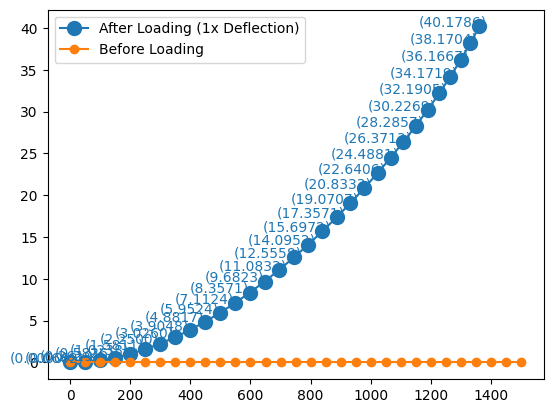

In [16]:
Multiplier = 1

uu = []
for i in range(1, len(u)+1):
    if i%2!=0:
        uu.append([u[i-1, 0]])
uu = np.matrix(uu)
        
x1 = [[0]]
te = 0
for i in range(len(uu)-1):
    te = te + le
    x1.append([te])
x1 = np.matrix(x1)

x = [[0]]
te = 0
for i in range(len(uu)-1):
    te = te + ((le)**2 - (uu[i+1,0]*Multiplier)**2)**0.5
    x.append([te])
x = np.matrix(x)

y = [[0]]
te = 0
for i in range(len(uu)-1):
    te = uu[i+1,0]*Multiplier
    y.append([te])
y = np.matrix(y)


plt.plot(x, y, marker='o', color='tab:blue', markersize=10, label=f'After Loading ({Multiplier}x Deflection)')
ind = 0
for i in zip(x,y):
    plt.annotate('(%.4f)'% (uu[ind,0]), xy=i, xytext=(x[ind]-200,y[ind]+0.0005), color='tab:blue')
    ind = ind+1

plt.plot(x1, np.zeros([x1.size,1]), marker='o', color='tab:orange', label='Before Loading')
plt.legend()